# Ansible Configuration files

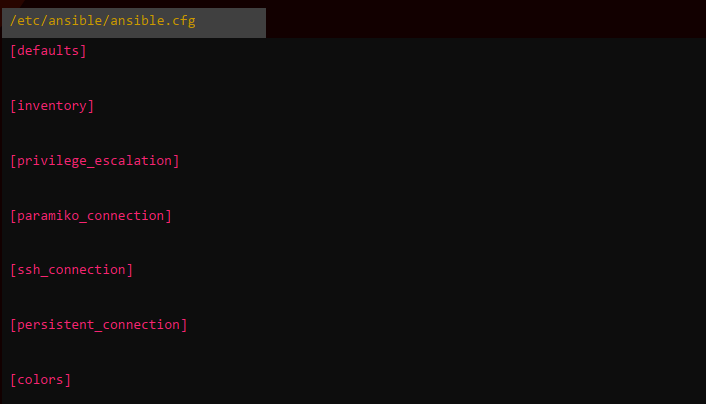

* When you install Ansible, just like any other software, it creates a default configuration file at the location, `/etc/ansible/ansible.cfg`.
* The Ansible configuration file governs the default behavior of Ansible using a set of parameters.
* An Ansible configuration file is divided into several sections:
    * `default` section,
    * `inventory` section, 
    * `privileges_escalation` section,
    * `ssh_connection` section, and 
    * `colors` section, to name a few.


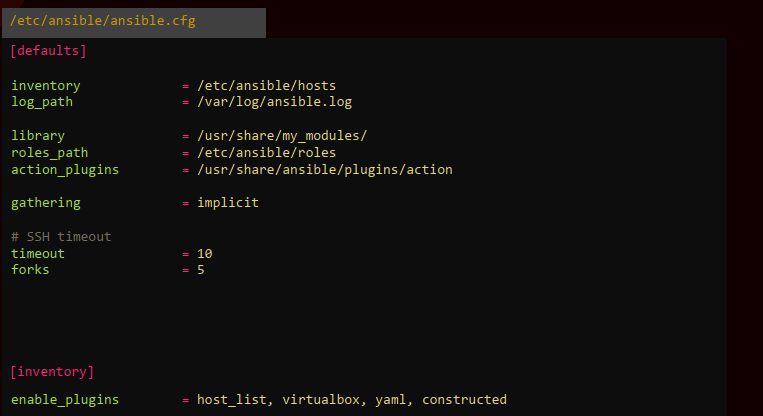

Within each of these sections, you have a number of options and their values, most of them being in the `default` section.
* `inventory`: specifies the default location of the Ansible inventory file.
* `log_path`: specifies the location of the log file.
* `library`: specifies the location of the modules.
* `roles_path`: specifies the location of the roles.
* `action_plugins`: specifies the location of the plugins directory.
* `gathering`: specifies whether Ansible should be gathering facts by default for all executions.
* `timeout`: specifies how long to wait before giving up on an SSH connection attempt.
* `forks`: specifies how many hosts Ansible should target at a time when executing playbooks against multiple hosts.

Out of the `inventory` section, you have `enable_plugins` options for enabling certain inventory plugins.

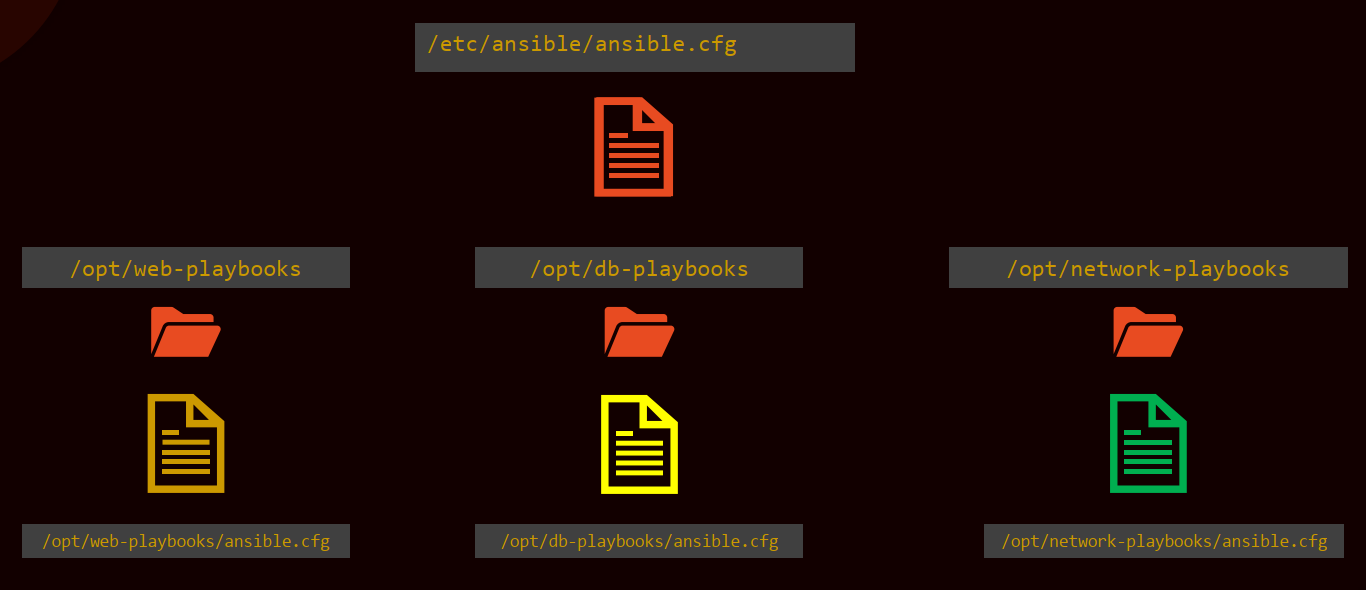

Now, we know the default location of Ansible's configuration file is at `/etc/ansible/ansible.cfg` path, and Ansible will consider the options & values configured in the `ansible.cfg` file when you run the playbooks from anywhere on the controlled machine.

Say I have multiple different playbooks in different locations on my host, like:
* one for web,
* another for the database, and 
* another for networking,

I require different settings in each of these.

For example, 
* When I run the playbooks for web, I do not want facts to be gathered;
* When I run the playbooks for the database, I do want facts to be gathered, but I do not want to display colored output for some reason.
* When I run the network playbooks, I want to extend the SSH timeout to 20 seconds instead of the default 10.

In that case, you make copies of the **default configuration file** and place them into their respective playbook directories, and make the necessary changes in them.

Next time you run an Ansible Playbook, it picks values from the config file within those directories.

That's one way to override default parameters in Ansible.

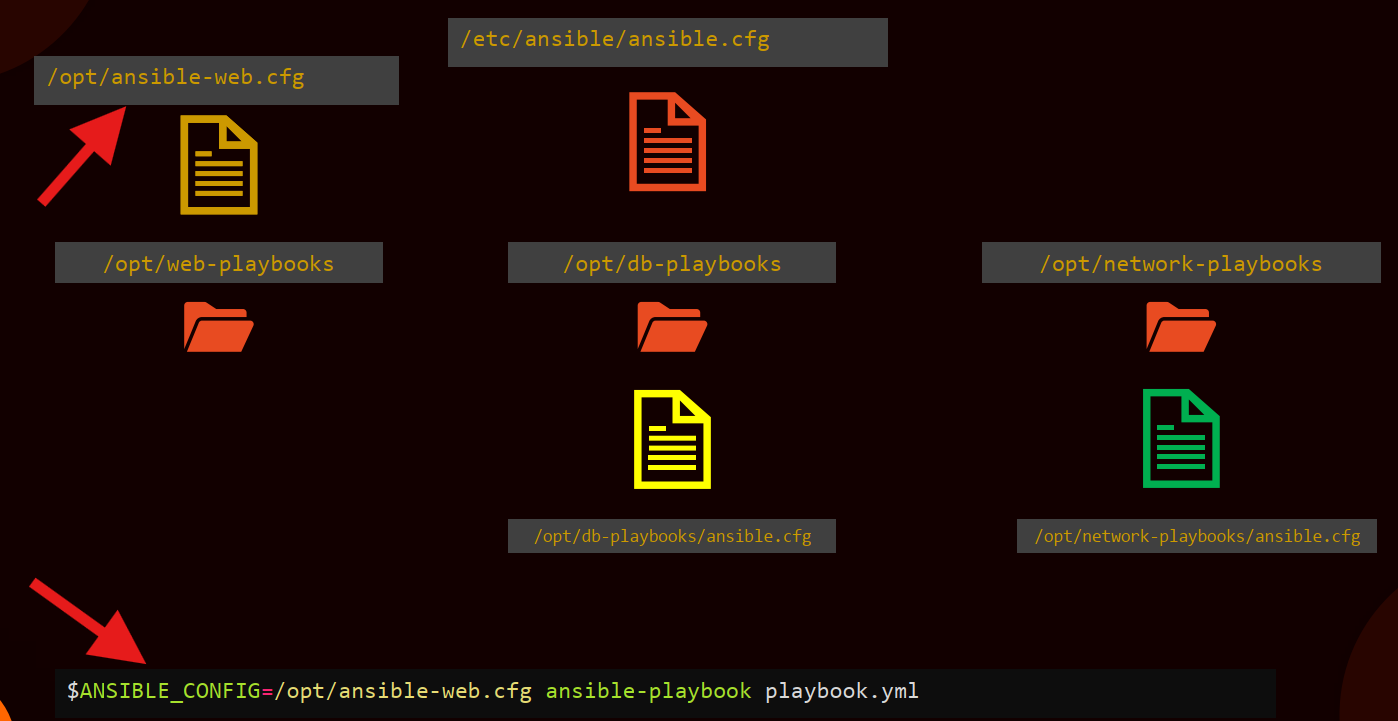

**What if you plan to store one of your configuration files in a directory other than your Playbooks directory?**

For example, you want to store the web configuration to a file at location `opt/ansible-web.cfg` and use that for multiple Ansible playbooks going forward.

In such cases, before running the Ansible playbook:
* You can specify the location to this configuration file through an environment variable, `ansible_config`, and 
* set it to the path to the new config file.

```bash
$ ANSIBLE_CONFIG=/opt/ansible-web.cfg ansible-playbook playbook.yml
```

This time, when the playbook is run, Ansible picks up that file instead of the default configuration file.

# Order & Priority of Configuration files

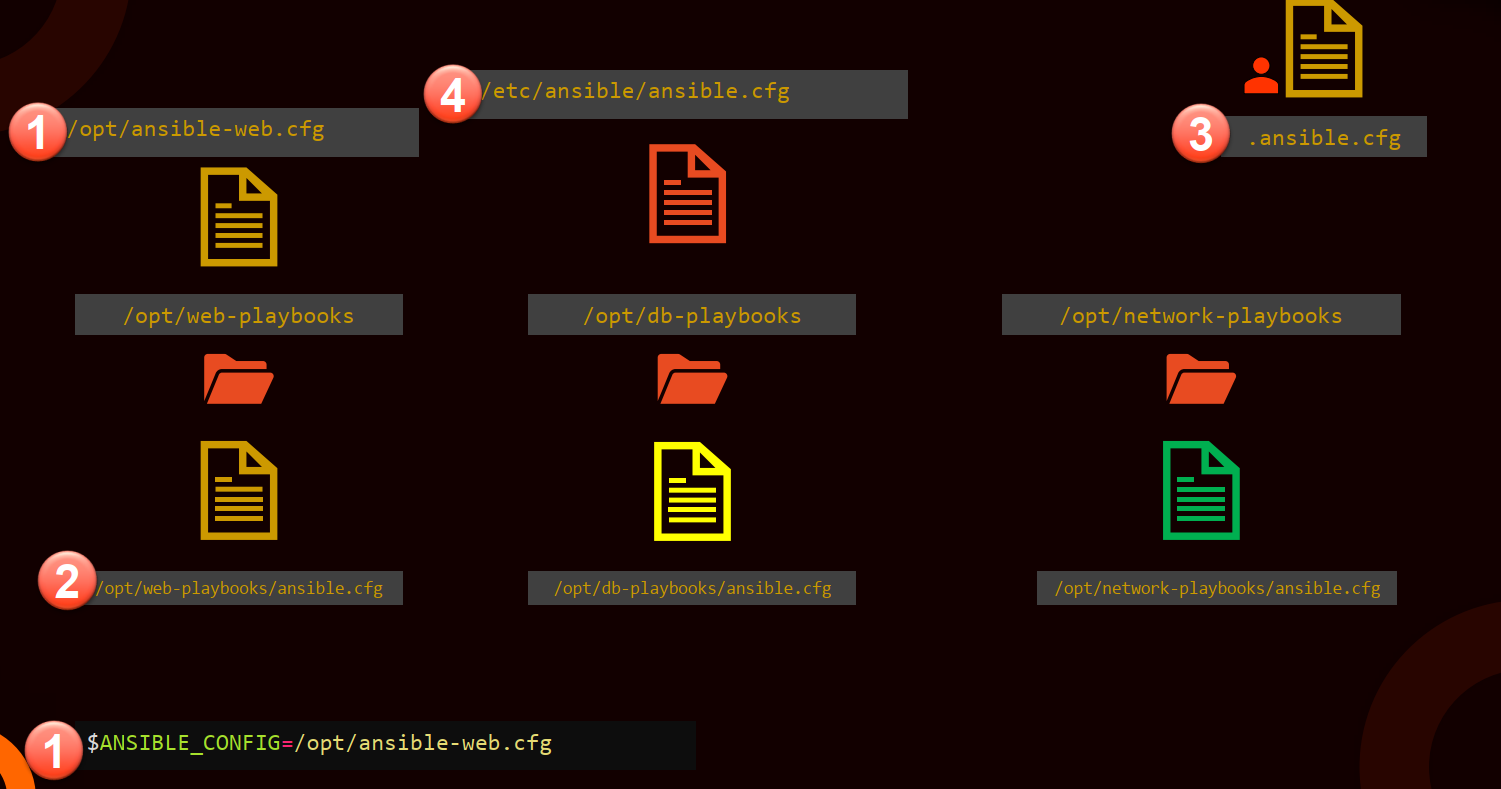

***What if you have all of them configured, and different values for different parameters in each of them?***

***Which one does it consider, and what order does Ansible pick the configuration files in?***

First priority is always to the **parameters configured in the file specified through an environment variable**.
* Any values configured in this file override the values configured in all other files.
* Followed by the `ansible.cfg` file in the **current directory** from which the Ansible playbooks are run.
* Followed by the `ansible.cfg` file in the **user's home directory**.
* Lastly, the **default Ansible configuration file** is at `/etc/ansible/ansible.cfg`.

**Remember, these files don't have to have all values.**
* You only need to override the parameter you want to override.
* Default values for other parameters will be automatically picked from the next config file in the priority chain.

# Ansible Configuration Variables

***You can override the configuration parameters by setting up the environment variable right before executing the Ansible playbook to change that behavior.***

How do you figure out what the environment variable should be?
* For most options in the configuration file, you can figure out the corresponding environment variable by changing the whole parameter to uppercase and prefixing `ANSIBLE_` to it.
* In this case, `gathering` is the parameter, so it would be `ANSIBLE_GATHERING` in uppercase.
* But you must check the documentation as well to confirm that's the right one.
* You could use the `ansible-config` command to view that information.


**Option 1**:
```bash
$ ANSIBLE_GATHERING=explicit ansible-playbook playbook.yml
```

> **If you're using a Linux shell, use the `export` command to set the environment variable.**
```bash
$ export ANSIBLE_GATHERING=explicit
$ ansible-playbook playbook.yml
```

**Option 2**: Update the `/opt/web-playbooks/ansible.cfg` file.

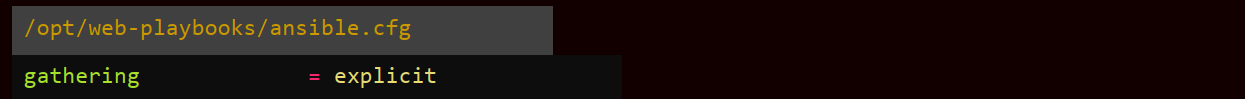

Now remember, any value set through an environment variable like this takes the **highest precedence**. 
* All other values specified in any configuration file are ignored if a corresponding environment variable is set with a different value.
* There are different ways to pass this environment variable in.
* You could simply specify it in a **`key=value`** format right before executing the playbook.

But remember, this setting is then only applicable to this single playbook execution, this single command.

If you want to persist that throughout your shell session, you could use the **`export`** command and set the environment variable shell-wide; until you exit from your shell, this setting will be active.

If you want to make the change persistent across different shells across different users running this playbook on different systems, then the best approach is to create a local copy of the configuration file in the Playbooks directory and update the parameter in it. That way, you can even push the configuration file into your code repository.

# View Configuration

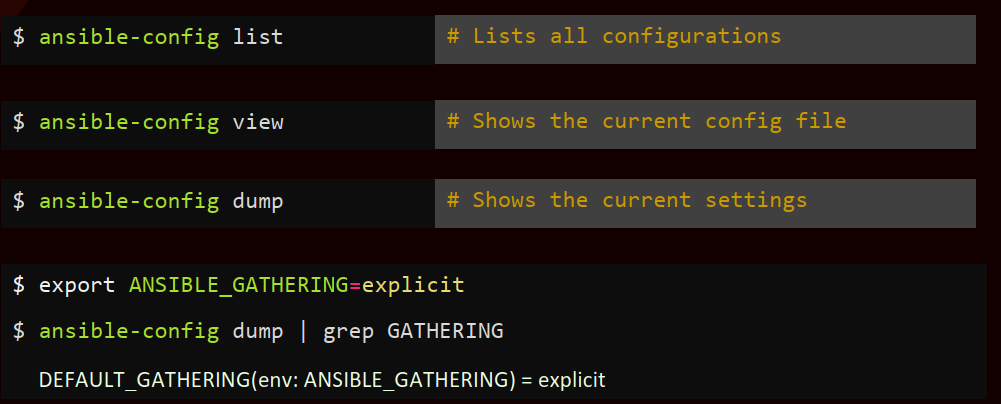

***How do you find out what the different configuration options are?***

***What are the corresponding environment variables, and what do they mean?***

Use the **`ansible-config list`** command to see:
* a list of all different configurations, 
* their default values, and 
* the values you can set.

---

We learned that you can have multiple configuration files on your system.

For example, 
* one in the present directory,
* another in the user's home directory, and 
* another in the `/etc/ansible` directory.

**How do you see which one is active?**

You can run the **`ansible-config view`** command to see the config file that's currently active.

---

We also learned different ways to specify configuration parameters to different configuration files, environment variables, and a mix of config files and environment variables.

**What if you're not sure which settings have been picked up by Ansible?**

The **`ansible-config`** dump command will show you a comprehensive list of current settings Ansible has picked up and where it's picked that from.